In [2]:
#Source of code: 
#https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/ML0101EN/ML0101EN-Reg-Simple-Linear-Regression-Co2-py-v1.ipynb
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline



In [4]:
import os
os.getcwd()

'/home/rod/Documents/ML_EDX/Regression'

Cement (kg/m^3)

Blast Furnace Slag (kg/m^3)

Fly Ash (kg/m^3)

Water (kg/m^3)

Superplasticizer (kg/m^3)

Coarse Aggregate (kg/m^3)

Fine Aggregate (kg/m^3)

Age (day)

Concrete compressive strength(MPa, megapascals)


In [3]:
df = pd.read_csv('concrete.csv')
df['wcr'] = df['water']/df['cement']

df.describe()

,cement,slag,fly_ash,water,wr,ca,fa,age,strength,wcr
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961,0.748266
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742,0.314005
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.266893
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000,0.533333
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000,0.675349
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000,0.935165
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,1.882353


### Limit only to data points with age of 28 days

In [6]:
cdf = df[df.age == 28]
cdf.describe()

,cement,slag,fly_ash,water,wr,ca,fa,age,strength,wcr
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.0,425.000000,425.000000
mean,265.444471,86.285176,62.795294,183.059529,6.995765,956.059294,764.377412,28.0,36.748612,0.810758
std,104.670313,87.826494,66.227712,19.328636,5.392275,83.801642,73.120452,0.0,14.711077,0.340255
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,28.0,8.540000,0.266893
25%,160.200000,0.000000,0.000000,171.000000,0.000000,882.600000,712.000000,28.0,26.230000,0.565868
50%,261.000000,94.700000,60.000000,185.000000,7.800000,953.200000,769.300000,28.0,33.760000,0.725000
75%,323.700000,160.500000,120.000000,193.300000,10.300000,1013.200000,811.500000,28.0,44.390000,1.104042
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,28.0,81.750000,1.882353


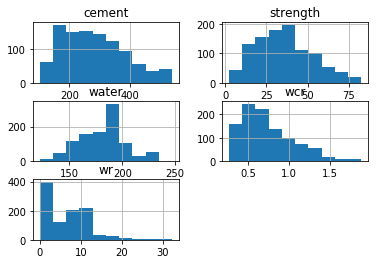

In [7]:
viz=df[['cement','water','wr','strength', 'wcr'
]]
viz.hist()
plt.show()

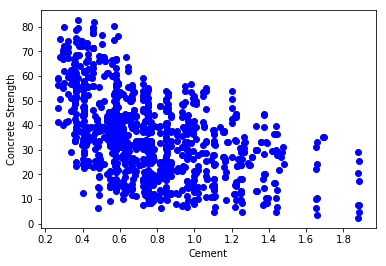

In [8]:
plt.scatter(df.wcr, df.strength, color='blue')
plt.xlabel('Water to Cement Ratio')
plt.ylabel('Concrete Strength')
plt.show()

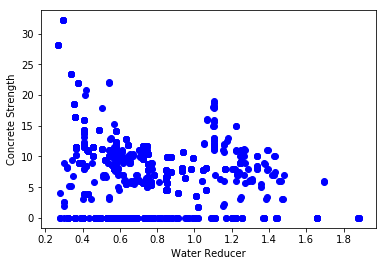

In [15]:
plt.scatter(df.wcr, df.wr, color='blue')
plt.xlabel('Water Reducer')
plt.ylabel('Concrete Strength')
plt.show()

#### Creating train and test dataset
80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [16]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

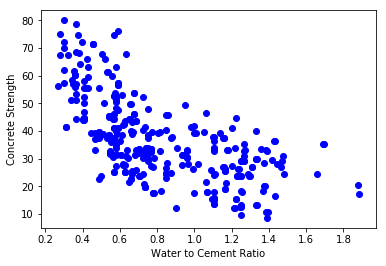

In [17]:
plt.scatter(train.wcr, train.strength, color='blue')
plt.xlabel('Water to Cement Ratio')
plt.ylabel('Concrete Strength')
plt.show()

#### Modeling
Using sklearn package to model data.

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['wcr']])
train_y = np.asanyarray(train[['strength']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-28.18964153]]
Intercept:  [59.8051126]


Text(0, 0.5, 'Strength')

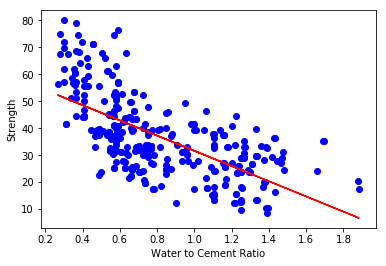

In [21]:
plt.scatter(train.wcr, train.strength,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Water to Cement Ratio")
plt.ylabel("Strength")

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['wcr']])
test_y = np.asanyarray(test[['strength']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 8.50
Residual sum of squares (MSE): 109.74
R2-score: -0.33


## Multiple Regression

As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [26]:
x_mr = np.asanyarray(train[['wcr','wr']])
y_mr = np.asanyarray(train[['strength']])
regr.fit (x_mr, y_mr)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-27.99121741   0.50532463]]


In [28]:
y_hat= regr.predict(test[['wcr','wr']])
x_mr = np.asanyarray(test[['wcr','wr']])
y_mr = np.asanyarray(test[['strength']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_mr) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_mr, y_mr))

Residual sum of squares: 98.41
Variance score: 0.50
